In [1]:
import numpy as np
from astropy.io import fits
import atlastools
from astropy import units as u

In [7]:
atlas_files_base = 'atlasfiles/'
file  = atlas_files_base + 'neckel.hamburg.atlas.wvscl_smooth.bintab.v3.fits.gz'

#file  = atlas_files_base + 'stenflo.SS3.5mA.bintab.v2.fits'
#file  = atlas_files_base + 'kitt.peak.ir.1-5micron.atlas.wavelnth.bintab.fits.gz'
#file  = atlas_files_base + 'kitt.peak.quietsun.350-740nm.1998.v1.fits.gz'
atlasdict_1 = atlastools.make_dictionary(file,1)
fileopen = fits.open(file, memmap=True)

atlas_name  = fileopen[1].header['ATL_NAME']

wave_col_id = fileopen[0].header['ATLWVCOL']
waveref_col = (atlastools.find_column_index(atlasdict_1, wave_col_id))[0].pop()
wavemin     = atlastools.search_key('TDMIN' + waveref_col[0], atlasdict_1)
wavemax     = atlastools.search_key('TDMAX' + waveref_col[0], atlasdict_1)
waveunit    = (atlastools.search_key('TCUNI' + waveref_col[0], atlasdict_1))[0]
waveunit_ap = atlastools.tunit_str_to_unit(waveunit[0])
wavemin     = wavemin[0] * waveunit_ap
wavemax     = wavemax[0] * waveunit_ap

print("Atlas Name: ",atlas_name)
print("Overall Wavelength Interval: ",wavemin," - ",wavemax)


Atlas Name:  Neckel/Hamburg/FTS Normalized Atlas 1999
Overall Wavelength Interval:  [329.00013] nm  -  [1250.99824853] nm


In [14]:
atlas = atlastools.make_atlas(file, 1, loaddata=1, startwave=600*u.nm, endwave=660*u.nm)
(atlas.components

checking  ['Wavelength Scale   1', 'Local Intensity   1', 'Local Flux   1']
keywords  ['TTYPE1', 'TTYPE2', 'TTYPE3']
Wavelength Scale   1
Primary Wavelength Scale TTYPE1 Wavelength Scale   1
Local Intensity   1
Local Flux   1
Wavelength Scale   1 [['1']]
<class 'str'> Nanometers
83445
populating solar atlas object


<SpectralCoord [600.00025667, 600.00091034, 600.00156402, ...,
                659.99792355, 659.99871449, 659.99950542] nm, 
	radial_velocity=0.0 km / s, 
	redshift=0.0, 
	doppler_rest=0.0 Angstrom, 
	doppler_convention=None, 
	observer=None, 
	target=None>

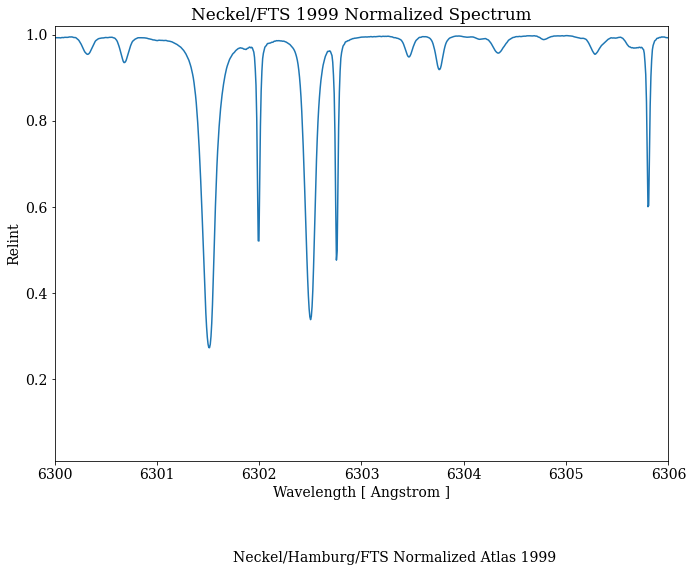

In [9]:
atlastools.atlas_spectrum_plot('Local Intensity   1', atlas, 
            startwave=630.0*u.nm, endwave=630.6*u.nm, plot_unit='angstrom')

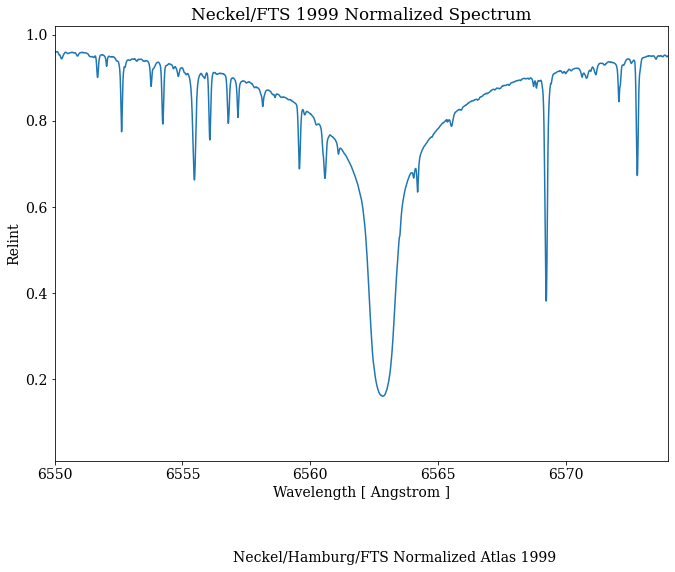

In [10]:
atlastools.atlas_spectrum_plot('Local Intensity   1', atlas, 
            startwave=655*u.nm, endwave=657.4*u.nm, plot_unit='angstrom')